In [11]:
!wget https://d3s0tskafalll9.cloudfront.net/media/documents/srgan_g.h5

--2022-09-16 04:14:42--  https://d3s0tskafalll9.cloudfront.net/media/documents/srgan_g.h5
Resolving d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)... 52.84.160.21, 52.84.160.195, 52.84.160.126, ...
Connecting to d3s0tskafalll9.cloudfront.net (d3s0tskafalll9.cloudfront.net)|52.84.160.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3088072 (2.9M) [application/x-hdf]
Saving to: ‘srgan_g.h5.3’

srgan_g.h5.3        100%[===================>]   2.94M  --.-KB/s    in 0.07s   

2022-09-16 04:14:42 (41.7 MB/s) - ‘srgan_g.h5.3’ saved [3088072/3088072]



In [21]:
import tensorflow as tf
import os

model_file = 'srgan_g.h5.3'
srgan = tf.keras.models.load_model(model_file, compile=False)

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf

def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image/255)
    sr = sr * 255
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train", "validation"],
    as_supervised=True
)

for i, (lr, hr) in enumerate(valid):
    if i == 1: break

srgan_hr = apply_srgan(lr)
print("✅")

✅


In [28]:
lr.shape

TensorShape([393, 510, 3])

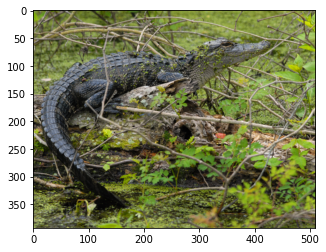

In [29]:
plt.imshow(lr)

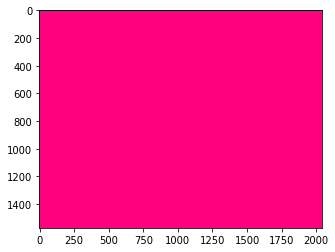

In [30]:
plt.imshow(srgan_hr)